<a href="https://colab.research.google.com/github/Ayush7614/Soomvaar/blob/main/Cats%20and%20Dogs%20Prediction/Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-22 05:02:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2021-05-22 05:02:21 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [23]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp')

['dap_multiplexer.7b569aea819d.root.log.INFO.20210522-042639.48',
 'cats_and_dogs_filtered.zip',
 'cats_and_dogs_filtered',
 'debugger_1mnvndb4cw',
 'dap_multiplexer.INFO',
 'initgoogle_syslog_dir.0']

In [24]:
base_dir='/tmp/cats_and_dogs_filtered'

#training and validation directory
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#training directory
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

#validation directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [25]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


print('Total training cat images.   ',len(os.listdir(train_cats_dir)))
print('Total training dog images.   ',len(os.listdir(train_dogs_dir)))

print('Total Validation cat images.   ',len(os.listdir(validation_cats_dir)))
print('Total Validation dog images.   ',len(os.listdir(validation_dogs_dir)))

['cat.286.jpg', 'cat.883.jpg', 'cat.290.jpg', 'cat.500.jpg', 'cat.430.jpg', 'cat.360.jpg', 'cat.698.jpg', 'cat.871.jpg', 'cat.85.jpg', 'cat.186.jpg']
['dog.131.jpg', 'dog.845.jpg', 'dog.274.jpg', 'dog.284.jpg', 'dog.247.jpg', 'dog.17.jpg', 'dog.514.jpg', 'dog.411.jpg', 'dog.399.jpg', 'dog.468.jpg']
Total training cat images.    1000
Total training dog images.    1000
Total Validation cat images.    500
Total Validation dog images.    500


In [26]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled here
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=50,
                              validation_steps=50,
                              verbose=2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 - 14s - loss: 2.0543 - acc: 0.5250 - val_loss: 0.6909 - val_acc: 0.5130
Epoch 2/50
10/10 - 13s - loss: 0.7014 - acc: 0.5450 - val_loss: 0.6900 - val_acc: 0.5100
Epoch 3/50
10/10 - 13s - loss: 0.6815 - acc: 0.5550 - val_loss: 0.6894 - val_acc: 0.5040
Epoch 4/50
10/10 - 12s - loss: 0.6840 - acc: 0.5800 - val_loss: 0.6781 - val_acc: 0.6190
Epoch 5/50
10/10 - 12s - loss: 0.6646 - acc: 0.5950 - val_loss: 0.7443 - val_acc: 0.5140
Epoch 6/50
10/10 - 12s - loss: 0.6636 - acc: 0.6300 - val_loss: 0.6720 - val_acc: 0.6110
Epoch 7/50
10/10 - 12s - loss: 0.6801 - acc: 0.6550 - val_loss: 0.6669 - val_acc: 0.5970
Epoch 8/50
10/10 - 12s - loss: 0.6657 - acc: 0.6400 - val_loss: 0.6578 - val_acc: 0.6200
Epoch 9/50
10/10 - 12s - loss: 0.6254 - acc: 0.6750 - val_loss: 0.9605 - val_acc: 0.5070
Epoch 10/50
10/10 - 12s - loss: 0.6913 - acc: 0.6050 - val_loss: 0.6467 - val_acc: 0.6370
Epoch 11/50
10/10 - 12s - loss: 0.6137 - acc: 0.6500 - val_loss: 0.6917 - val_acc: 0.5760
Epoch 12/50
10/10 -

Text(0.5, 1.0, 'Training and validation loss')

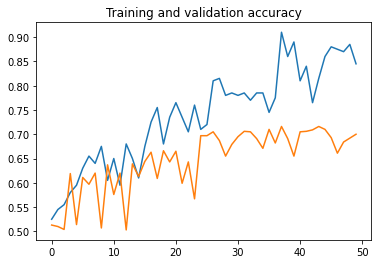

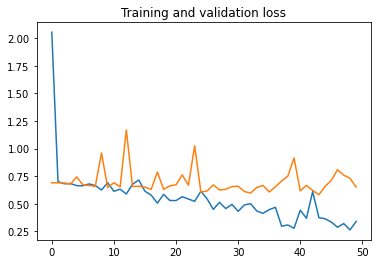

In [31]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

import matplotlib.pyplot as plt
# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
